In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import  pyplot as plt
%config Completer.use_jedi = False
df = pd.read_csv("ai_financial_market_daily_realistic_synthetic.csv")

In [5]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

**COMPANY NAMES**

In [12]:
df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

**COLUMN FOR YEAR**

In [13]:
df['year'] = df['Date'].dt.year

In [14]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [16]:
df.isnull().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
year                       0
dtype: int64

**Company's spending or R&D**

In [20]:
print("Spending in billions")
spending = df.groupby('Company')['R&D_Spending_USD_Mn'].sum() / 1000

Spending in billions


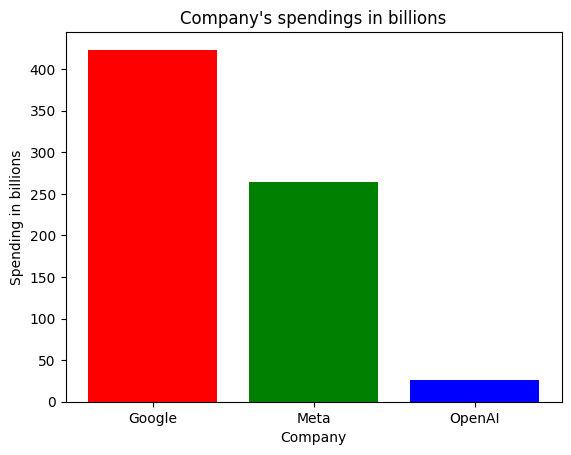

In [26]:
plt.bar(spending.index, spending.values, color=['r', 'g', 'b'])
plt.xlabel('Company')
plt.ylabel("Spending in billions")
plt.title("Company's spendings in billions")
plt.show()

**Company's revenue**

In [30]:
revenue = df.groupby('Company')['AI_Revenue_USD_Mn'].sum() / 1000

<BarContainer object of 3 artists>

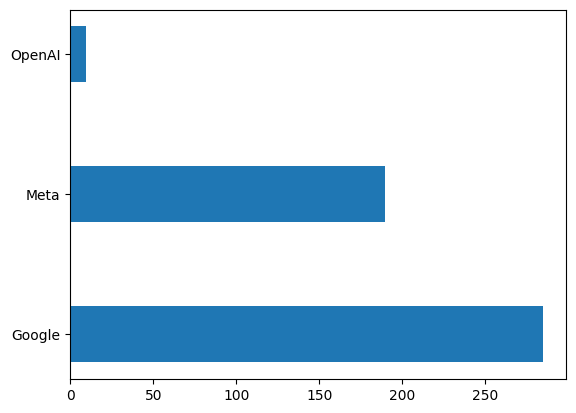

In [37]:
plt.barh(revenue.index, revenue.values, height=0.4)

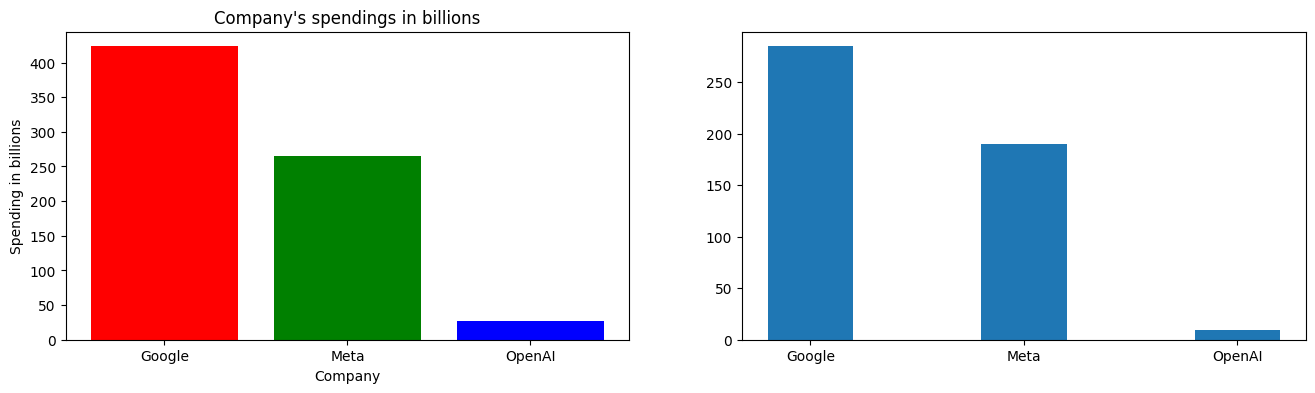

In [40]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(spending.index, spending.values, color=['r', 'g', 'b'])
plt.xlabel('Company')
plt.ylabel("Spending in billions")
plt.title("Company's spendings in billions")
plt.subplot(1,2,2)
plt.bar(revenue.index, revenue.values, width=0.4)
plt.show()

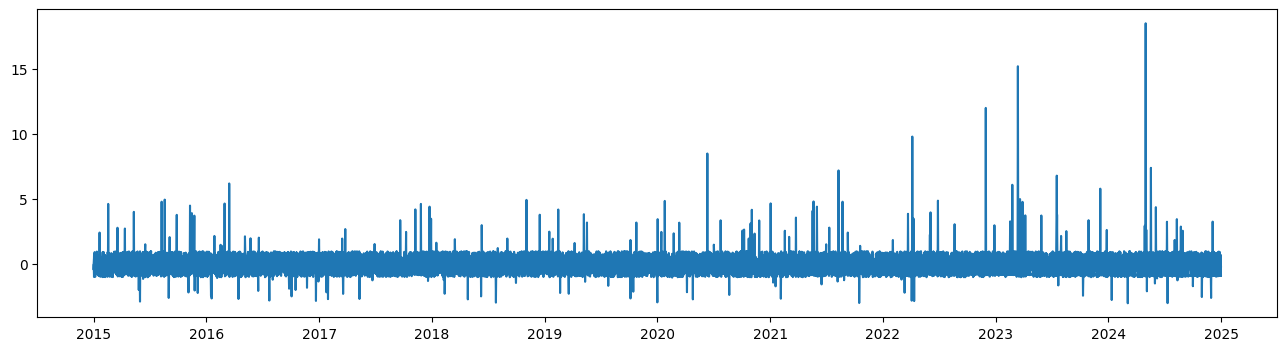

In [44]:
#Date impact
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['Stock_Impact_%'])
plt.show()

In [45]:
data_openai = df[df['Company'] == 'OpenAI']
data_google = df[df['Company'] == 'Google']
data_meta = df[df['Company'] == 'Meta']

In [48]:
max_rows = df.groupby('Company')['Stock_Impact_%'].idxmax()
df.loc[max_rows, ['Company', 'Stock_Impact_%', 'Event']]

,Company,Stock_Impact_%,Event
4092,Google,6.2,AlphaGo beats Lee Sedol
10731,Meta,7.4,LLaMA 3 release (predicted)
3408,OpenAI,18.5,GPT-5 release (predicted)


**AI'S REVENUE**

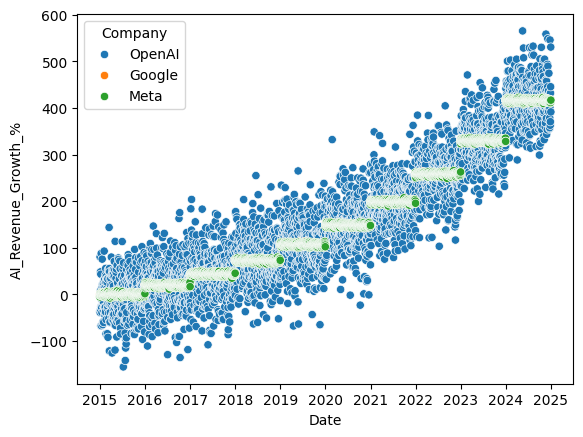

In [51]:
sns.scatterplot(x='Date', y='AI_Revenue_Growth_%', data=df, hue='Company')
plt.show()

**OPENAI'S GROWTH**

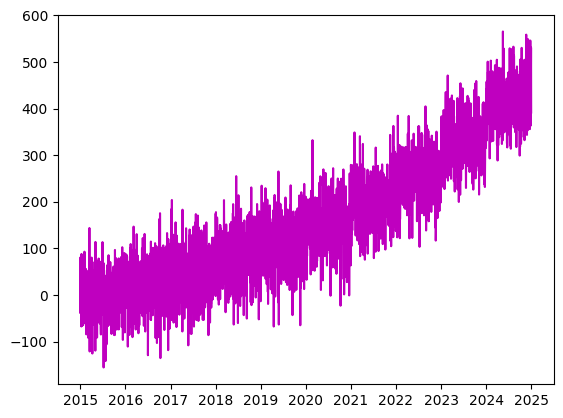

In [54]:
plt.plot(data_openai['Date'], data_openai['AI_Revenue_Growth_%'], color='m')

In [56]:
df.corr(numeric_only=True)

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,year
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628,0.297701
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017,0.526478
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937,0.952199
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000,0.016525
year,0.297701,0.526478,0.952199,0.016525,1.000000


<Axes: >

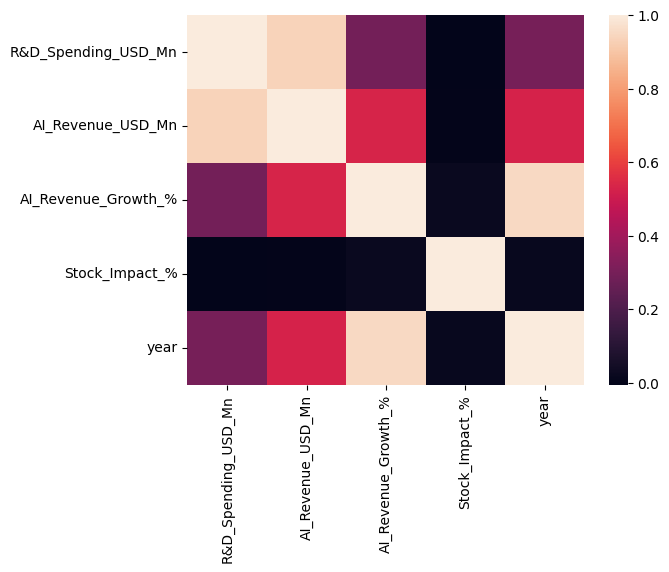

In [57]:
sns.heatmap(df.corr(numeric_only=True))

In [62]:
spent = df.groupby('year')['R&D_Spending_USD_Mn'].sum()
rev = df.groupby('year')['AI_Revenue_USD_Mn'].sum()

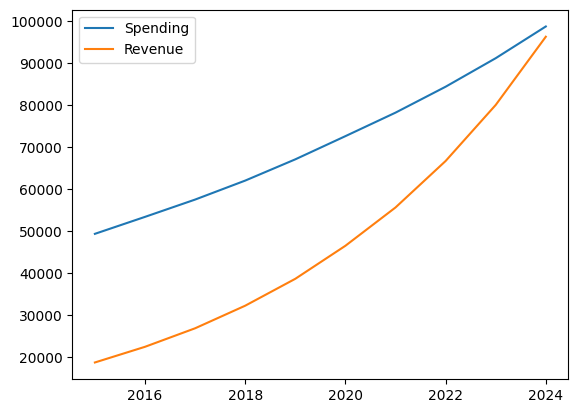

In [70]:
plt.plot(spent.index, spent.values)
plt.plot(rev.index, rev.values)
plt.legend(['Spending', 'Revenue'])
plt.show()

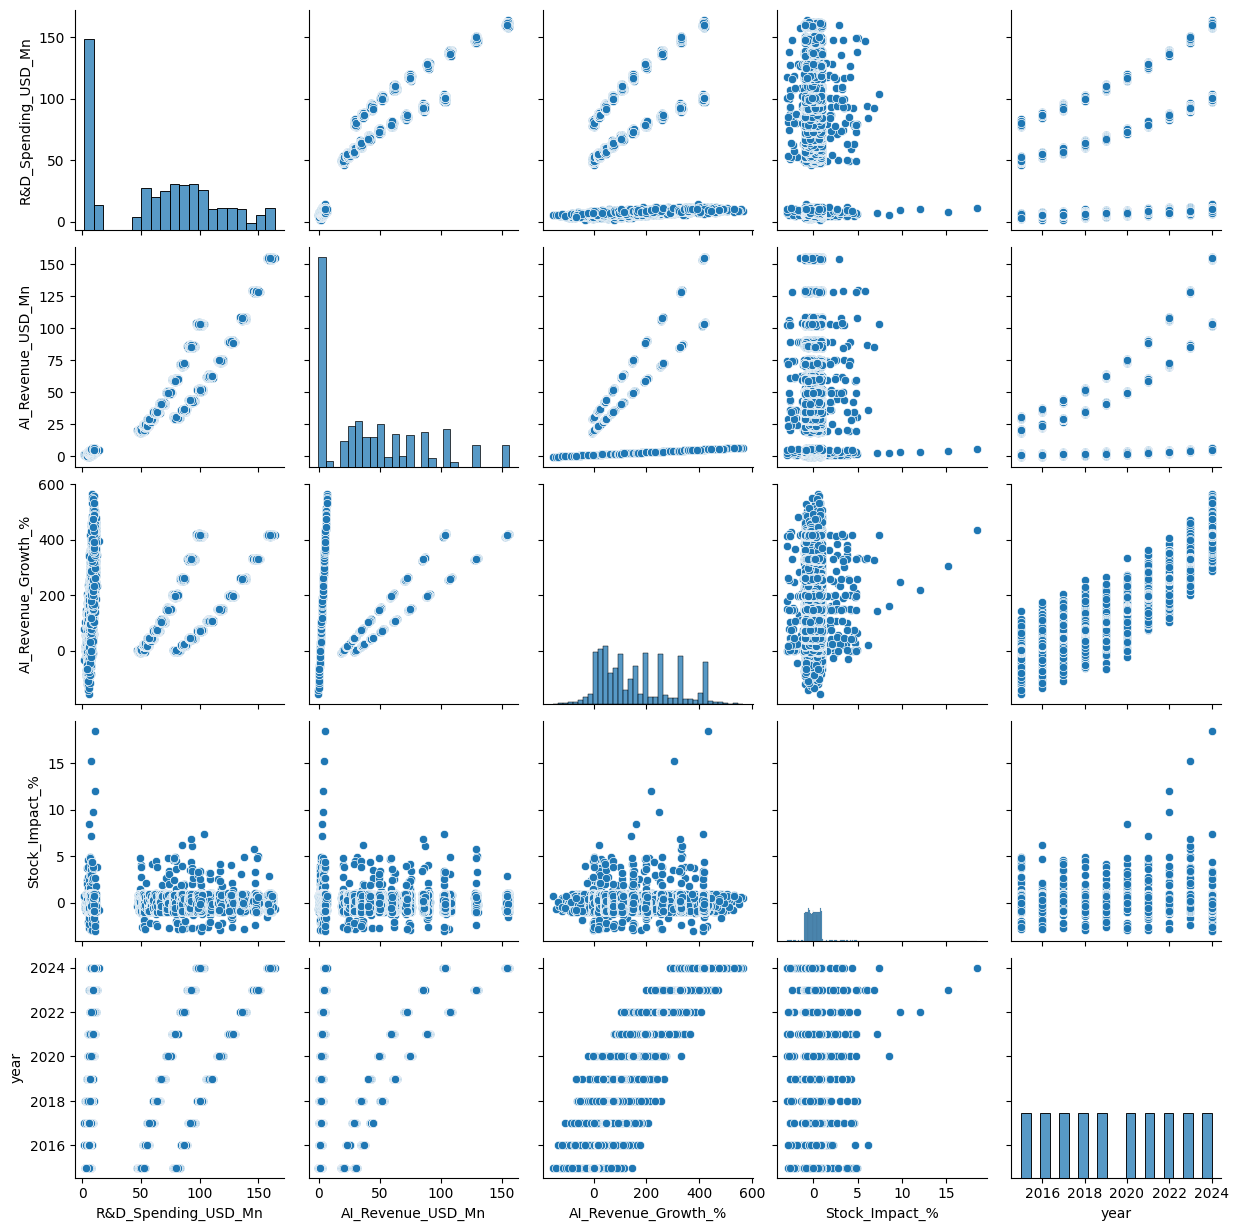

In [71]:
sns.pairplot(df)

In [72]:
df.Event.value_counts()

Event
AI speech recognition release      37
AI-powered search update           32
AI Ads Optimization upgrade        32
AI partnership deal                32
AI Video Recommendation upgrade    29
Cloud AI launch                    27
AI ethics policy update            27
TensorFlow open-source release      1
LLaMA 2 release                     1
LLaMA 1 release                     1
Gemini AI release                   1
Bard chatbot launch                 1
MUM Search Model launch             1
BERT for Search launch              1
AlphaGo beats Lee Sedol             1
ChatGPT (GPT-3.5) launch            1
GPT-5 release (predicted)           1
GPT-4 release                       1
DALL·E 2 release                    1
Codex release                       1
GPT-3 release                       1
GPT-2 release                       1
GPT-1 release                       1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [74]:
df[df['Event'] == 'Gemini AI release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,year
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.8,2023


In [80]:
event_ana = df.loc[6914 : 6934]

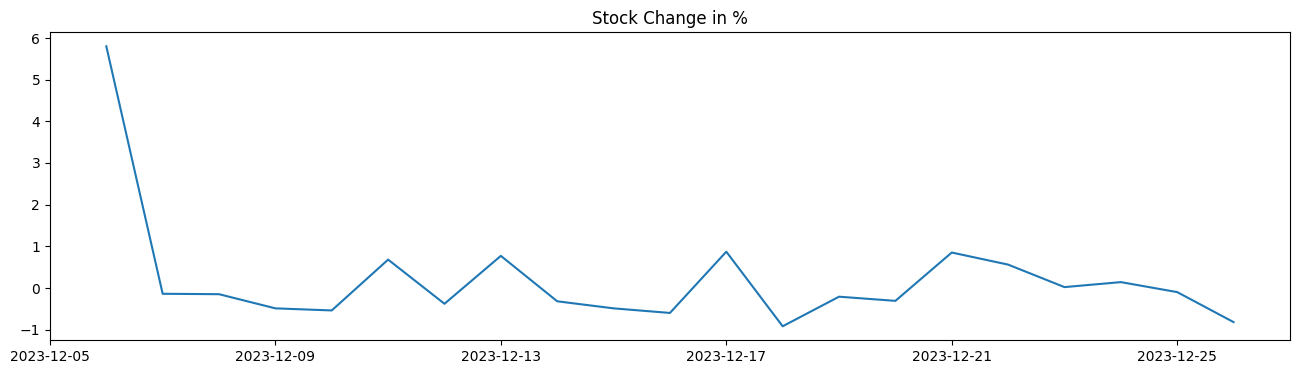

In [83]:
plt.figure(figsize=(16,4))
plt.plot(event_ana['Date'], event_ana['Stock_Impact_%'])
plt.title('Stock Change in %')
plt.show()

In [84]:
df[df['Event'] == 'LLaMA 2 release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,year
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.8,2023


In [85]:
event_ana2 = df.loc[10426 : 10446]

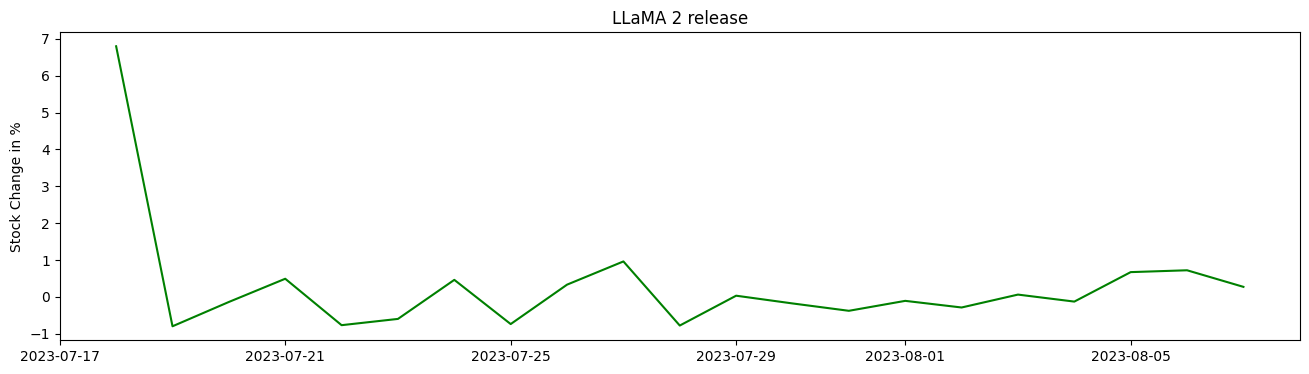

In [88]:
plt.figure(figsize=(16,4))
plt.plot(event_ana2['Date'], event_ana2['Stock_Impact_%'], c='g')
plt.title('LLaMA 2 release')
plt.ylabel('Stock Change in %')
plt.show()

In [91]:
df.groupby('Company')['Stock_Impact_%'].mean() * 100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

In [92]:
df.groupby('Company')['R&D_Spending_USD_Mn'].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

In [93]:
df.groupby('Company')['Stock_Impact_%'].max()

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

In [95]:
stocks = df.groupby(['year', 'Company'])['Stock_Impact_%'].max()

<Axes: ylabel='year,Company'>

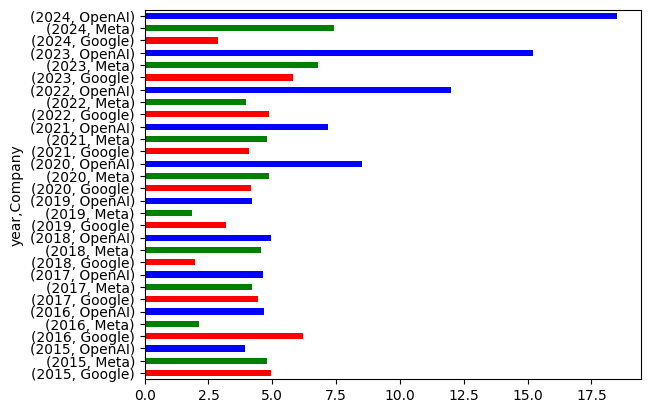

In [98]:
stocks.plot(kind='barh', color=['r','g','b'])